# NCA classification accuracy

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
progress_dfs = []
for ts in range(1, 5):
  progress_df = pd.read_csv(f"../training/progress_{ts}.txt", sep=";")
  progress_df["target_set"] = ts
  progress_dfs.append(progress_df)
progress = pd.concat(progress_dfs, ignore_index=True)
progress.head()

,iteration,loss,accuracy,target_set
0,0,0.095679,0.322581,1
1,1,0.090688,0.419355,1
2,2,0.085618,0.354839,1
3,3,0.087278,0.225806,1
4,4,0.089885,0.193548,1


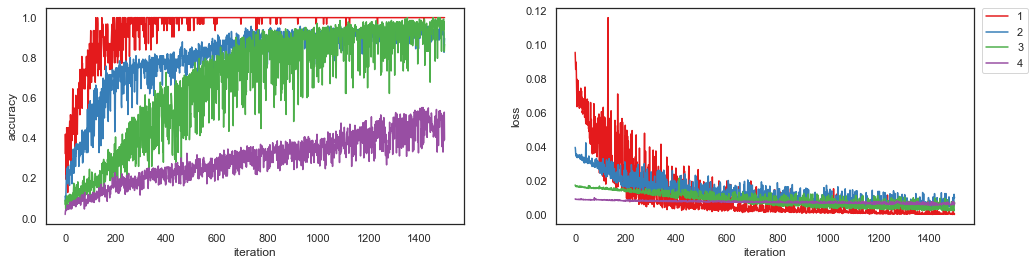

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
sns.lineplot(data=progress, x="iteration", y="accuracy", hue="target_set", ax=ax[0], palette="Set1", legend=False)
sns.lineplot(data=progress, x="iteration", y="loss", hue="target_set", ax=ax[1], palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.show()

In [8]:
df = pd.read_csv("classification.txt", sep=";")
df["majority_vote_accuracy"] = np.where(df.shape_id == df.majority_vote, 1, 0)
df.head()

,target_set,shape_id,readable_shape,step,"classification[x,y,c]",accuracy,majority_vote,majority_vote_accuracy
0,1,0,1111-1111-1001,0,"0,1,1-1,1,1-2,1,1-3,1,1-0,2,0-1,2,1-2,2,1-3,2,...",0.2,1,0
1,1,0,1111-1111-1001,10,"0,1,0-1,1,0-2,1,0-3,1,0-0,2,0-1,2,0-2,2,0-3,2,...",1.0,0,1
2,1,0,1111-1111-1001,20,"0,1,0-1,1,0-2,1,0-3,1,0-0,2,0-1,2,0-2,2,0-3,2,...",1.0,0,1
3,1,0,1111-1111-1001,30,"0,1,0-1,1,0-2,1,0-3,1,0-0,2,0-1,2,0-2,2,0-3,2,...",1.0,0,1
4,1,0,1111-1111-1001,40,"0,1,0-1,1,0-2,1,0-3,1,0-0,2,0-1,2,0-2,2,0-3,2,...",1.0,0,1


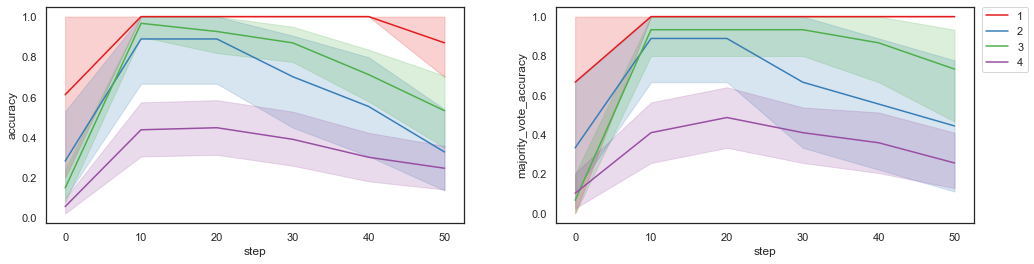

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
sns.lineplot(data=df, x="step", y="accuracy", hue="target_set", ax=ax[0], palette="Set1", legend=False)
sns.lineplot(data=df, x="step", y="majority_vote_accuracy", hue="target_set", ax=ax[1], palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.show()

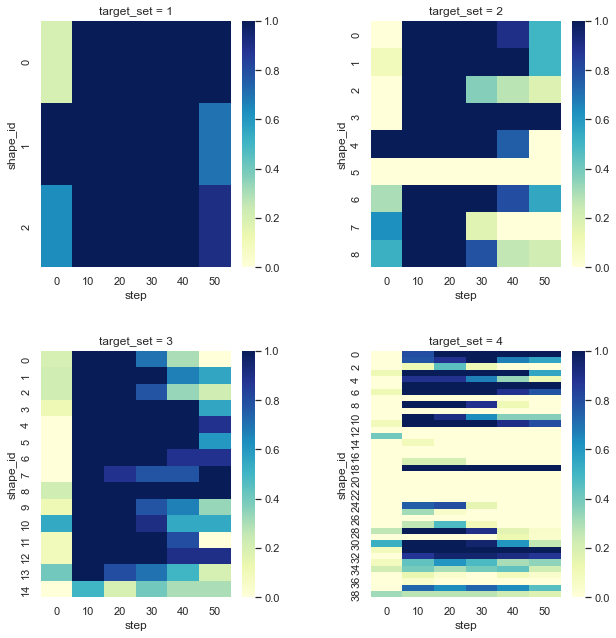

In [63]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=5.0)
ts = 1
for i in range(2):
  for j in range(2):
    sns.heatmap(df.loc[df.target_set == ts].pivot(index="shape_id", columns="step", values="accuracy"), vmin=0, vmax=1,
                ax=ax[i][j], cmap="YlGnBu")
    ax[i][j].set_title(f"target_set = {ts}")
    ts += 1
plt.show()

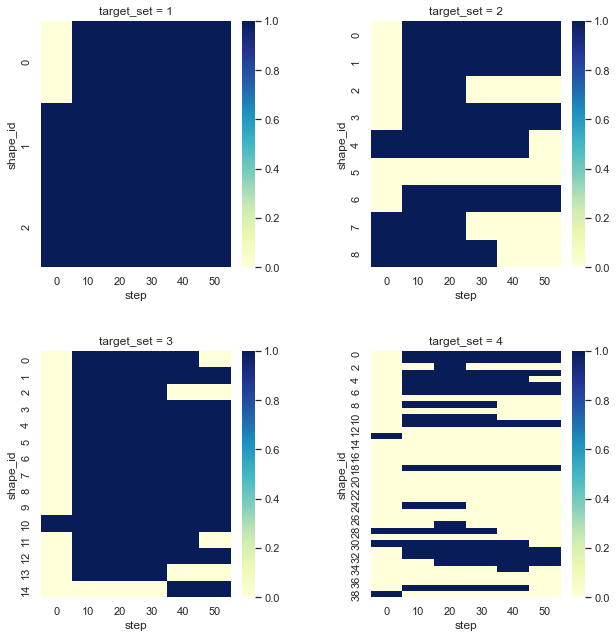

In [64]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=5.0)
ts = 1
for i in range(2):
  for j in range(2):
    sns.heatmap(df.loc[df.target_set == ts].pivot(index="shape_id", columns="step", values="majority_vote_accuracy"),
                vmin=0, vmax=1,
                ax=ax[i][j], cmap="YlGnBu")
    ax[i][j].set_title(f"target_set = {ts}")
    ts += 1
plt.show()